---
title: "Machine Learning Tutorial 01 - Regression"
date: 2020-03-19T18:11:47+09:00
tags:
  - "Machine Learning"
  - "Python"
  - "Regression"
  - "회귀모형"
  - "데이터 전처리"
categories:
  - "Machine Learning"
  - "Python"
  - "머신러닝"
menu: 
  main:
    name: Machine Learning Tutorial 01 - Regression
---

## 지도 학습 VS 비지도 학습

머신러닝은 크게 두 가지 유형으로 분류한다. 우선 아래 표를 보자. 

|          구분          |               지도학습<br>(Supervised Learning)              |                       비지도 학습<br>(Unsupervised Learning)                       |
|:----------------------:|:------------------------------------------------------------:|:----------------------------------------------------------------------------------:|
| 알고리즘<br>(분석모형) | 회귀분석<br>분류모형                                         | 군집분석                                                                           |
|          특징          | 정답을 알고 있는 상태에서 학습<br>모형 평가 방법이 다양한 편 | 정답이 없는 상태에서 서로 비슷한 데이터를 찾아서 그룹화<br>모형 평가 방법이 제한적 |

<center>출처: 오승환 (2019). 파이썬 머신러닝 판다스 데이터 분석 (p. 285)</center>

`지도학습(Supervised Learning)`은 종속변수(Dependent Variable) 선정이 매우 중요하며. 종속변수 선정과 함께 데이터 분석도 같이 병행이 된다. 그러나 `비지도학습(Unsupervised Learning)`은 데이터가 많은데, 어떻게 분류하면 좋을지 모를 때 서로 비슷한 특징끼리 결합 및 그룹화 하는 것을 말한다. 

## 회귀모형 예제

우선 회귀모형 모형부터 만들자. 아래 코드를 그대로 실행하면 될 것이다. 만약 `파이썬(Python)` 설치가 필요한 사람은 [Tensorflow 2.0 Installation](https://chloevan.github.io/python/settings01_installation/)에서 설치 방법을 따라 설치를 진행하기를 바란다. 

In [16]:
## 기본 라이브러리 불러오기
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

```
---------------------------------------------------------------------------
ModuleNotFoundError                       Traceback (most recent call last)
<ipython-input-1-5e3e002ab9bf> in <module>
      2 import pandas as pd
      3 import numpy as np
----> 4 import matplotlib.pyplot as plt
      5 import seaborn as sns
      6 from sklearn.model_selection import train_test_split

ModuleNotFoundError: No module named 'matplotlib'

```

### No Module Names 'name_of_library'

가끔 이런 모듈이 없다고 나올 때가 있다. 이해하기 어려운 것은 아니다. 가장 좋은 것은 언제나 에러 메시지 전체를 복사해서 구글에서 검색을 한 뒤 해결책을 빠르게 찾는 것이 좋다. 

위 에러는 `matplotlib` 모듈이 없다는 뜻이다. 

그럼 설치를 해보자. 어떻게? 자세한 내용은 공식문서를 참고한다. [matplotlib](https://matplotlib.org/users/installing.html)
간단한 설치방법은 아래와 같다. 

터미널에서 아래와 같이 입력한다. 참고로 MacOS / 필자는 pip3로 설치할 예정이다. [윈도우 아나콘다 설치 버전](https://anaconda.org/conda-forge/matplotlib)

```{terminal}
$ python3 -m pip install -U pip
$ python3 -m pip install -U matplotlib
```

`matplotlib`와 마찬가지로 `seaborn` 그리고 `scikit-learn` 모듈도 같이 위와 같은 형태로 설치를 하면 된다. 

### Sample Tutorial 

전체 소스코드를 실행한 뒤, 하나씩 간단하게 설명을 진행하도록 한다. 

In [19]:
import io
import requests
import pprint

url = "https://raw.githubusercontent.com/chloevan/datasets/master/weather/Weather.csv"
url = requests.get(url).content
weather_df = pd.read_csv(io.StringIO(url.decode('utf-8')))

pprint.pprint(weather_df.head())

     STA      Date Precip  WindGustSpd    MaxTemp    MinTemp   MeanTemp  \
0  10001  1942-7-1  1.016          NaN  25.555556  22.222222  23.888889   
1  10001  1942-7-2      0          NaN  28.888889  21.666667  25.555556   
2  10001  1942-7-3   2.54          NaN  26.111111  22.222222  24.444444   
3  10001  1942-7-4   2.54          NaN  26.666667  22.222222  24.444444   
4  10001  1942-7-5      0          NaN  26.666667  21.666667  24.444444   

  Snowfall PoorWeather  YR  ...  FB  FTI ITH  PGT  TSHDSBRSGF  SD3  RHX  RHN  \
0        0         NaN  42  ... NaN  NaN NaN  NaN         NaN  NaN  NaN  NaN   
1        0         NaN  42  ... NaN  NaN NaN  NaN         NaN  NaN  NaN  NaN   
2        0         NaN  42  ... NaN  NaN NaN  NaN         NaN  NaN  NaN  NaN   
3        0         NaN  42  ... NaN  NaN NaN  NaN         NaN  NaN  NaN  NaN   
4        0         NaN  42  ... NaN  NaN NaN  NaN         NaN  NaN  NaN  NaN   

  RVG  WTE  
0 NaN  NaN  
1 NaN  NaN  
2 NaN  NaN  
3 NaN  NaN  
4 N

/Users/jihoonjung/Library/Python/3.7/lib/python/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (7,8,18,25) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [22]:
pprint.pprint(weather_df.describe())

                 STA  WindGustSpd        MaxTemp        MinTemp  \
count  119040.000000   532.000000  119040.000000  119040.000000   
mean    29659.435795    37.774534      27.045111      17.789511   
std     20953.209402    10.297808       8.717817       8.334572   
min     10001.000000    18.520000     -33.333333     -38.333333   
25%     11801.000000    29.632000      25.555556      15.000000   
50%     22508.000000    37.040000      29.444444      21.111111   
75%     33501.000000    43.059000      31.666667      23.333333   
max     82506.000000    75.932000      50.000000      34.444444   

            MeanTemp             YR             MO             DA          DR  \
count  119040.000000  119040.000000  119040.000000  119040.000000  533.000000   
mean       22.411631      43.805284       6.726016      15.797530   26.998124   
std         8.297982       1.136718       3.425561       8.794541   15.221732   
min       -35.555556      40.000000       1.000000       1.000000    2.0

In [23]:
X = weather_df['MinTemp'].values.reshape(-1,1)
y = weather_df['MaxTemp'].values.reshape(-1,1)

# 데이터 셋 분리 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 모형 개발 선언
regressor = LinearRegression()  
regressor.fit(X_train, y_train) # 알고리즘 트레이닝

# intercept: 상수
pprint.pprint(regressor.intercept_)
# slope: 기울기
pprint.pprint(regressor.coef_) 

# 예측
y_pred = regressor.predict(X_test)

# 데이터 셋 비교
pred_df = pd.DataFrame({'실제값': y_test.flatten(), '예측값': y_pred.flatten()})
pprint.pprint(pred_df.head())

array([10.66185201])
array([[0.92033997]])
         실제값        예측값
0  28.888889  33.670351
1  31.111111  30.091251
2  27.222222  26.512151
3  28.888889  31.113851
4  23.333333  15.774852


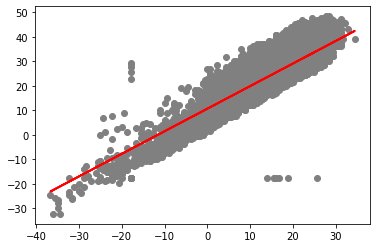

In [24]:
# 테스트 데이터와 예측값의 기울기 비교
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [25]:
# 모형 성능
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 3.19932917837853
MSE: 17.631568097568447
RMSE: 4.198996082109204


... Will continue ... Happy To Code

End of Document